<div style="text-align:center;"> <h2> Tracé de vecteurs vitesses en Python sur des données modélisées</h2></div>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

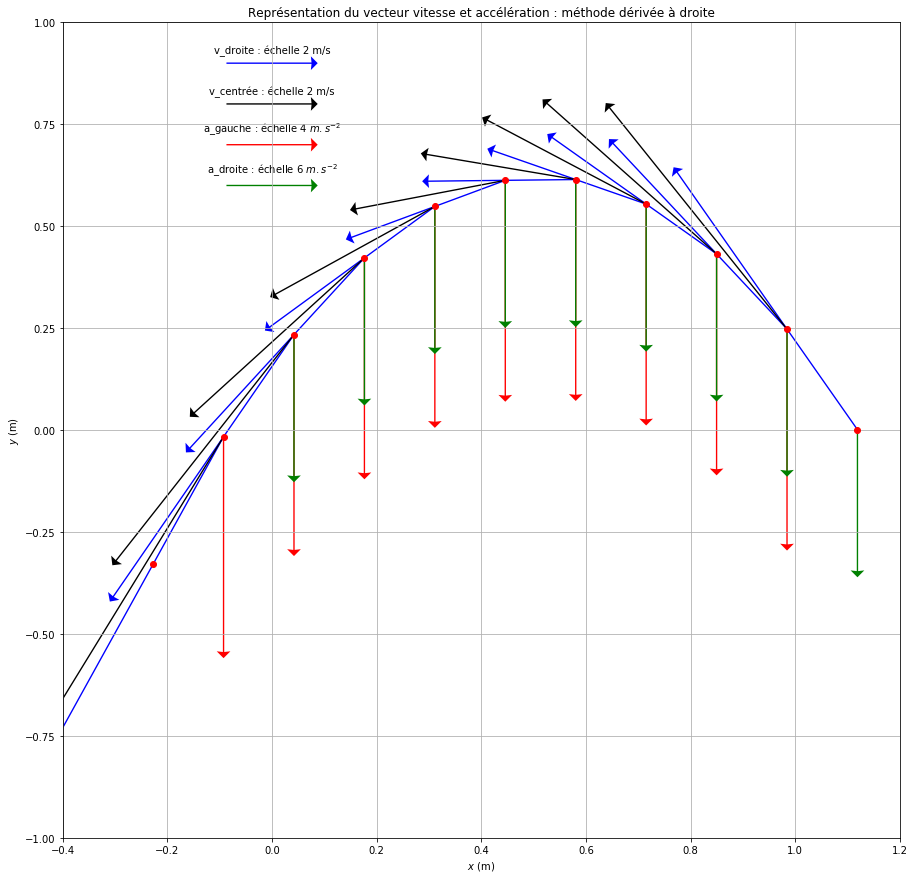

In [28]:
#Modèle issu d'une modélisation des données de pointage dans Tracker.
# y(t) = - 4,853 t2 +3,47 t + 1,11.10-3
# x(t)=-1,683 t + 1,119

tp=[0.000,0.040,0.080,0.120,0.160,0.200,0.240,0.280,0.320,0.360,0.400,0.440,0.480,0.520,0.560,0.600,0.640,0.680,0.720,0.760,0.800]
xp=[-1.683*i+1.119 for i in tp]
yp=[-4.853*i**2+3.47*i+1.11*10**-3 for i in tp]

#données retenues pour le tracé
intpts=2 #1 tous les points, 2 un point sur 2, 3 correspond à 1 pt sur 3
xt=[]
yt=[]
tt=[]

for i in range (0,len(xp),intpts):
  xt.append(xp[i])  
  yt.append(yp[i])
  tt.append(tp[i])

#Calcul des coordonnées Vx et Vy nouvelle méthode
Vx=[]
for i in range(len(xt)-1) :
    Vxi=(xt[i+1]-xt[i])/(tt[i+1]-tt[i])
    Vx.append(Vxi)
Vy=[]
for i in range(len(yt)-1) :
    Vyi=(yt[i+1]-yt[i])/(tt[i+1]-tt[i])
    Vy.append(Vyi)
#Calcul des coordonnées de Vx Vy ancienne méthode
V2x=[]
for i in range(1,len(xt)-1) :
    Vxi=(xt[i+1]-xt[i-1])/(tt[i+1]-tt[i-1])
    V2x.append(Vxi)
V2y=[]
for i in range(1,len(yt)-1) :
    Vyi=(yt[i+1]-yt[i-1])/(tt[i+1]-tt[i-1])
    V2y.append(Vyi)


#préparation de la zone graphique
plt.figure(figsize=(15,15))
plt.title("Représentation du vecteur vitesse et accélération : méthode dérivée à droite")

plt.xlim(-0.4,1.2) 
plt.ylim(-1,1)
plt.grid()

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
#tracé des points de la trajectoire
plt.plot(xt,yt,'ro')
normeV=[]
normeV2=[]
normeA=[]
normeA2=[]
#tracé des vecteurs vitesse et accélérration avec un facteur d'échelle

# v : nouvelle méthode 
for i in range(len(Vx)):
    vecteurV=plt.quiver(xt[i],yt[i],Vx[i]/5,Vy[i]/5,width=0.003,headwidth=10,scale=1,color='b',angles='xy', units='xy')

# v : méthode centrée 
for i in range(len(V2x)):
    vecteurV2=plt.quiver(xt[i+1],yt[i+1],V2x[i]/5,V2y[i]/5,width=0.003,headwidth=10,scale=1,angles='xy', units='xy')
    
# a : vi - vi-1
for i in range(1,len(Vx)):    
    vecteurA=plt.quiver(xt[i],yt[i],((Vx[i]-Vx[i-1])/(tt[i]-tt[i-1]))/20,((Vy[i]-Vy[i-1])/(tt[i]-tt[i-1]))/20,width=0.003,headwidth=10,scale=1,color='r',angles='xy', units='xy')
    #normeA.append((((Vx[i]-Vx[i-1])/(tt[i]-tt[i-1]))**2+((Vy[i]-Vy[i-1])/(tt[i]-tt[i-1]))**2)**0.5)

# a : vi+1 - vi
for i in range(len(Vx)-1):    
    vecteurA2=plt.quiver(xt[i],yt[i],((Vx[i+1]-Vx[i])/(tt[i+1]-tt[i]))/30,((Vy[i+1]-Vy[i])/(tt[i+1]-tt[i]))/30,width=0.003,headwidth=10,scale=1,color='g',angles='xy', units='xy')
    #normeA2.append((((Vx[i+1]-Vx[i])/(tt[i+1]-tt[i]))**2+((Vy[i+1]-Vy[i])/(tt[i+1]-tt[i]))**2)**0.5)

#Légendes
plt.quiverkey(vecteurV, 0, 0.9, 0.2,label='v_droite : échelle 2 m/s',coordinates='data')
plt.quiverkey(vecteurV2, 0, 0.8, 0.2,label='v_centrée : échelle 2 m/s',coordinates='data')
plt.quiverkey(vecteurA, 0, 0.7, 0.2,label='a_gauche : échelle 4 $m.s^{-2}$',coordinates='data')
plt.quiverkey(vecteurA2, 0, 0.6, 0.2,label='a_droite : échelle 6 $m.s^{-2}$',coordinates='data')


#print(" gmoyen =",np.mean(np.array(normeA)), "m.s^-2")
#print(" écart-type =",np.std(np.array(normeA)),"m.s^-2")
#print(" gmoyen =",np.mean(np.array(normeA2)), "m.s^-2")
#print(" écart-type =",np.std(np.array(normeA2)),"m.s^-2")

plt.show()